In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as cl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [171]:
config = {
    "base_dir":        "/storage/vbsjjlnu/VBSjjlnu_v7/",
    "plot_config":     "FullRun2_v7",
    "cut":             "boost_sig",
    "model_version":   "v3_d",
}

output_dir = os.path.join(config["base_dir"], config["plot_config"], config['cut'], 'plots')
os.makedirs(output_dir, exist_ok=True)

In [172]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])

# create the model directory
model_dir   = os.path.join(config_base_dir, config["cut"] , "models",  config["model_version"])
os.makedirs(model_dir, exist_ok=True)

import yaml
model_config_file = open(model_dir + "/model_config.yml", "r")
model_config = yaml.safe_load(model_config_file)

for key in ["samples_version", "cols"]:
    config[key] = model_config[key]
    

# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
import pickle
signal = pickle.load(open(os.path.join(samples_dir, "for_training/signal_balanced.pkl"),     "rb"))
bkg    = pickle.load(open(os.path.join(samples_dir, "for_training/background_balanced.pkl"), "rb"))

scaler = pickle.load(open(f"{model_dir}/scaler_model.pkl", "rb"))

In [173]:
import tensorflow as tf 

model = tf.keras.models.load_model(os.path.join(model_dir, "model.h5"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [174]:
bkg["DNN"] = model.predict(scaler.transform(bkg[config["cols"]].values), batch_size=4096)
signal["DNN"] = model.predict(scaler.transform(signal[config["cols"]].values), batch_size=4096)

In [175]:
wjets = bkg[bkg["sample_name"] == "Wjets_HT"][['DNN']+ config["cols"]]
top = bkg[bkg["sample_name"] == "top"][['DNN']+ config["cols"]]
DY = bkg[bkg["sample_name"] == "DY"][['DNN']+ config["cols"]]
VV = bkg[bkg["sample_name"] == "VV"][['DNN']+ config["cols"]]
Fake = bkg[bkg["sample_name"] == "Fake"][['DNN']+ config["cols"]]
sig = signal[['DNN']+  config["cols"]]

In [176]:
#Correlation matrices

In [177]:
sig_corr = sig.corr()

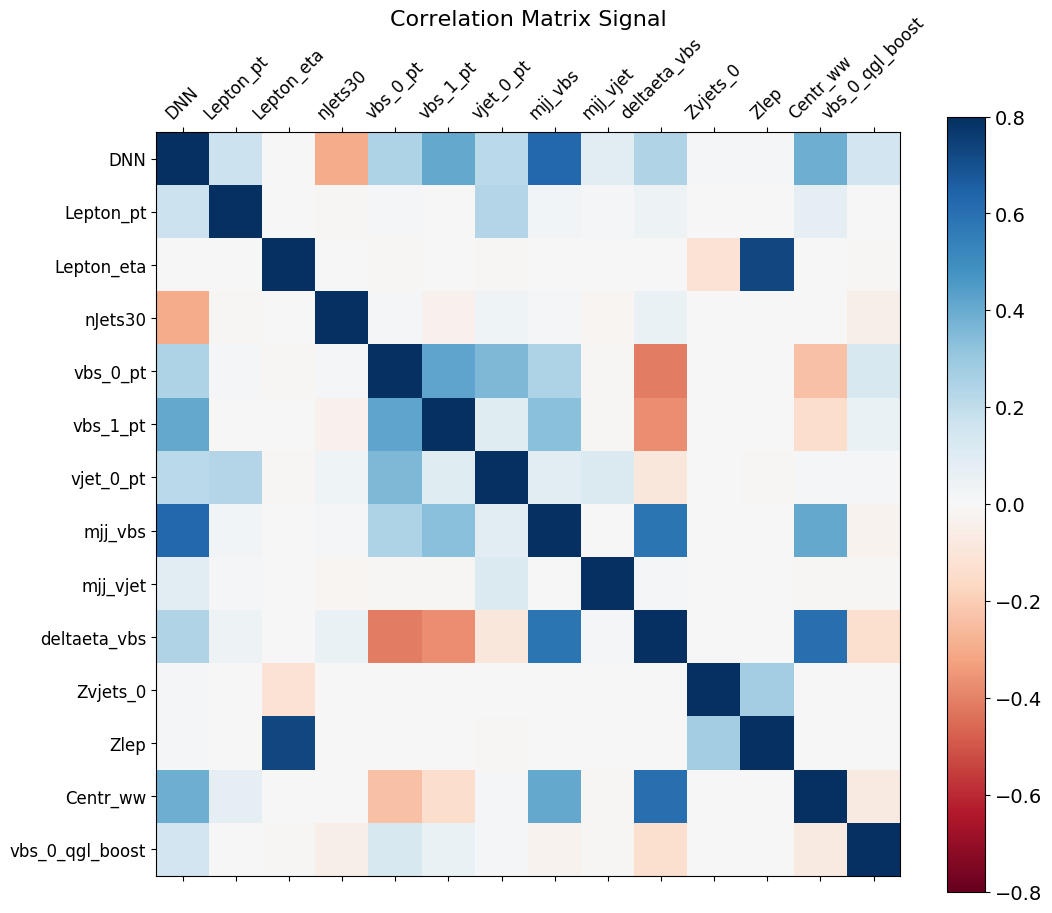

In [178]:
f = plt.figure(figsize=(12,10))
a = plt.matshow(sig.corr(), fignum=f.number, cmap="RdBu", vmin=-0.8, vmax=0.8)
plt.xticks(range(sig.shape[1]), sig.columns, fontsize=12, rotation=45)
plt.yticks(range(sig.shape[1]), sig.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Signal', fontsize=16, pad=50);
plt.savefig(output_dir + "/sig_corrmat.png")

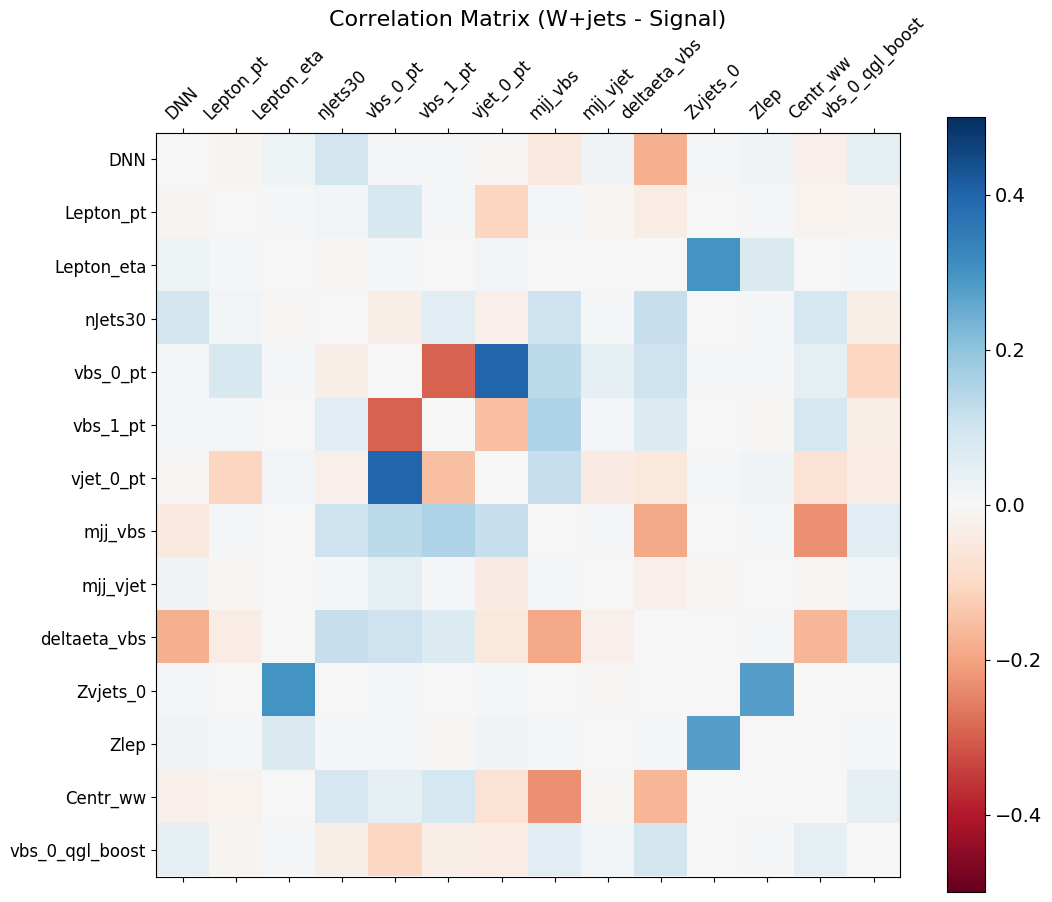

In [179]:
f = plt.figure(figsize=(12,10))
plt.matshow(wjets.corr() - sig_corr, fignum=f.number, cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.xticks(range(wjets.shape[1]), wjets.columns, fontsize=12, rotation=45)
plt.yticks(range(wjets.shape[1]), wjets.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix (W+jets - Signal)', fontsize=16, pad=50);
plt.savefig(output_dir + "/wjets_diffsig_corrmat.png")

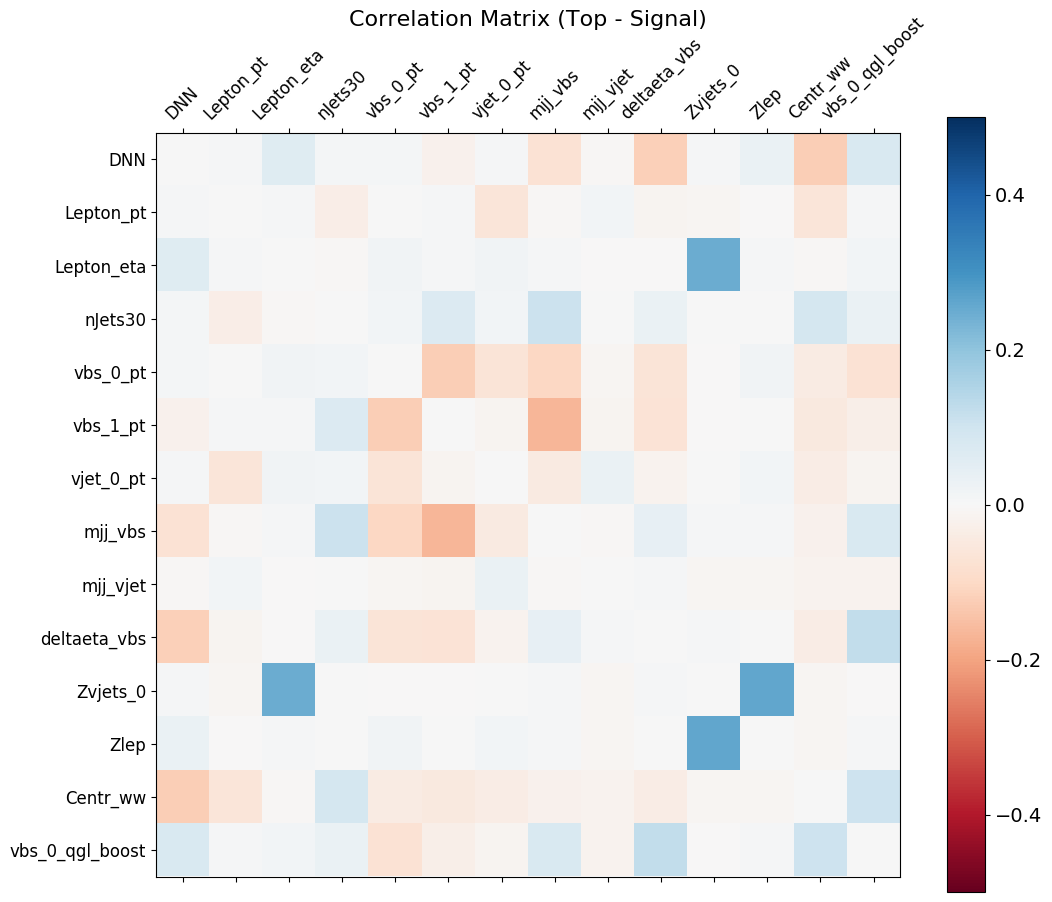

In [180]:
f = plt.figure(figsize=(12,10))
plt.matshow(top.corr() - sig_corr, fignum=f.number, cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.xticks(range(top.shape[1]), top.columns, fontsize=12, rotation=45)
plt.yticks(range(top.shape[1]), top.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix (Top - Signal)', fontsize=16, pad=50);
plt.savefig(output_dir + "/top_diffsig_corrmat.png")

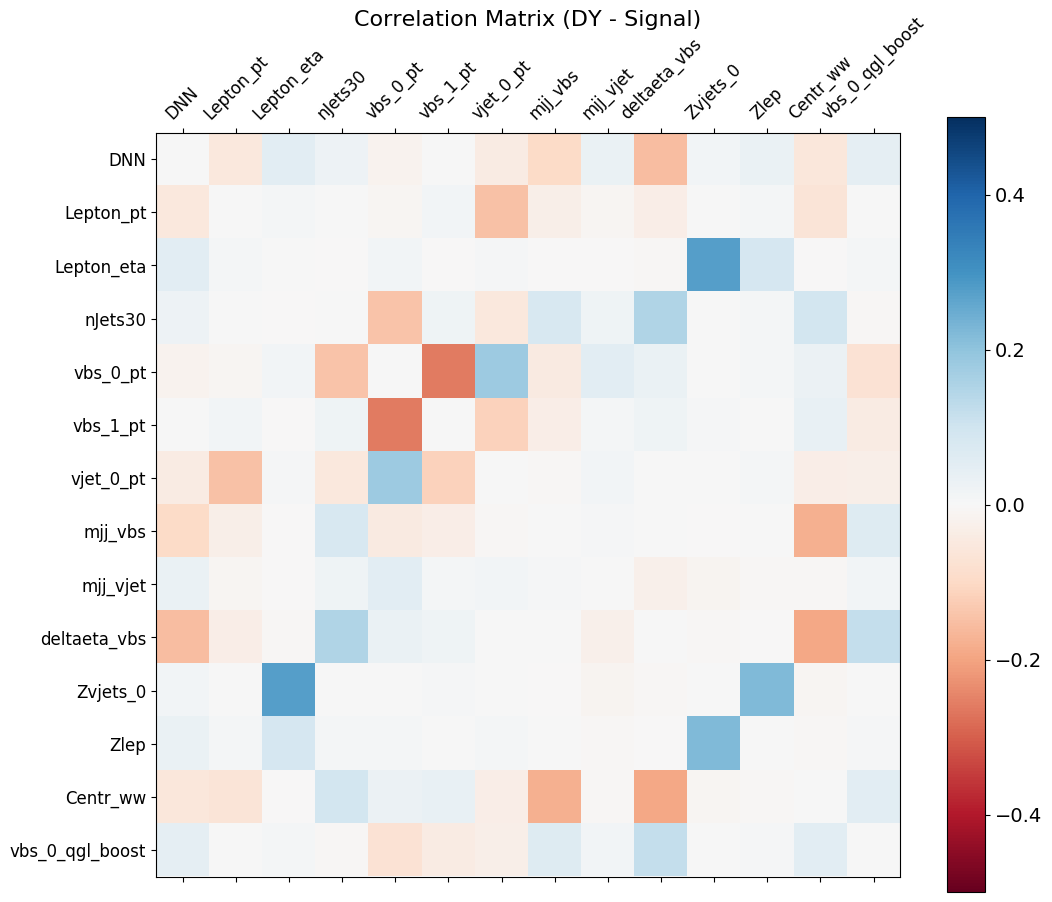

In [181]:
f = plt.figure(figsize=(12,10))
plt.matshow(DY.corr() - sig_corr, fignum=f.number, cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.xticks(range(DY.shape[1]), wjets.columns, fontsize=12, rotation=45)
plt.yticks(range(DY.shape[1]), wjets.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix (DY - Signal)', fontsize=16, pad=50);
plt.savefig(output_dir + "/DY_diffsig_corrmat.png")

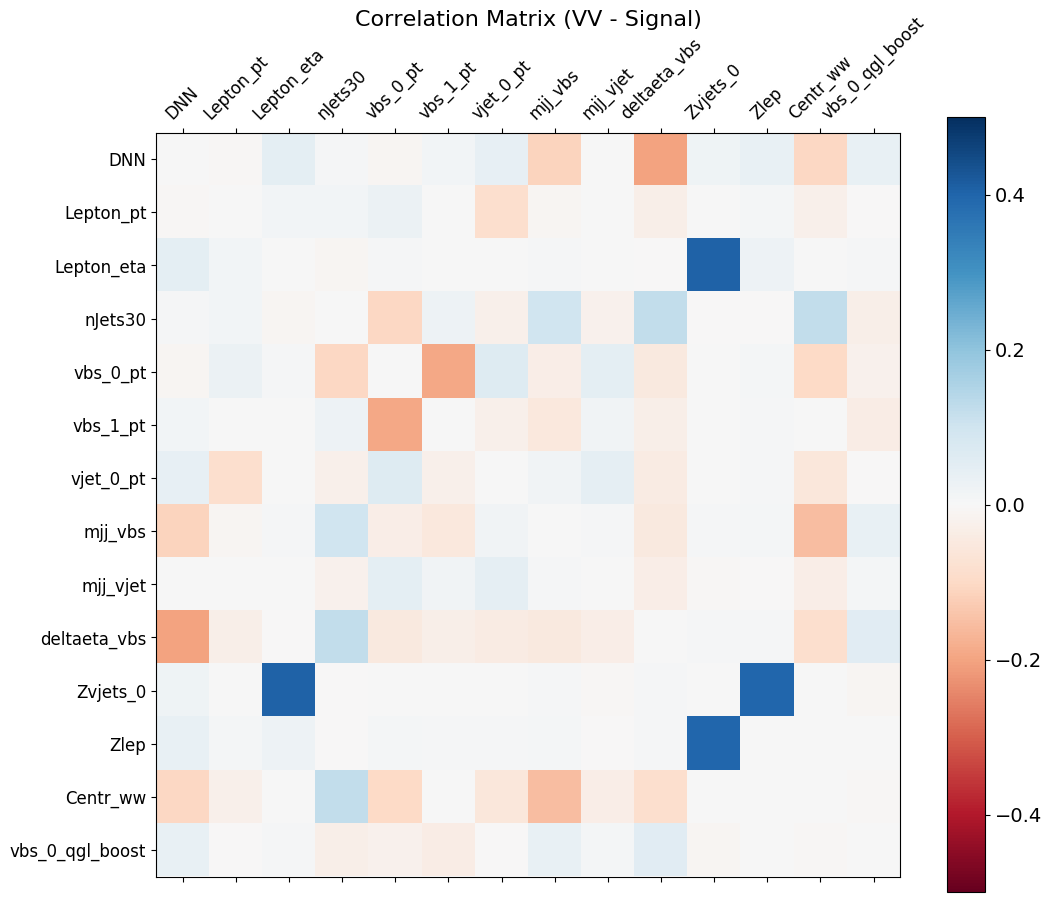

In [182]:
f = plt.figure(figsize=(12,10))
plt.matshow(VV.corr() - sig_corr, fignum=f.number, cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.xticks(range(VV.shape[1]), VV.columns, fontsize=12, rotation=45)
plt.yticks(range(VV.shape[1]), VV.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix (VV - Signal)', fontsize=16, pad=50);
plt.savefig(output_dir + "/VV_diffsig_corrmat.png")

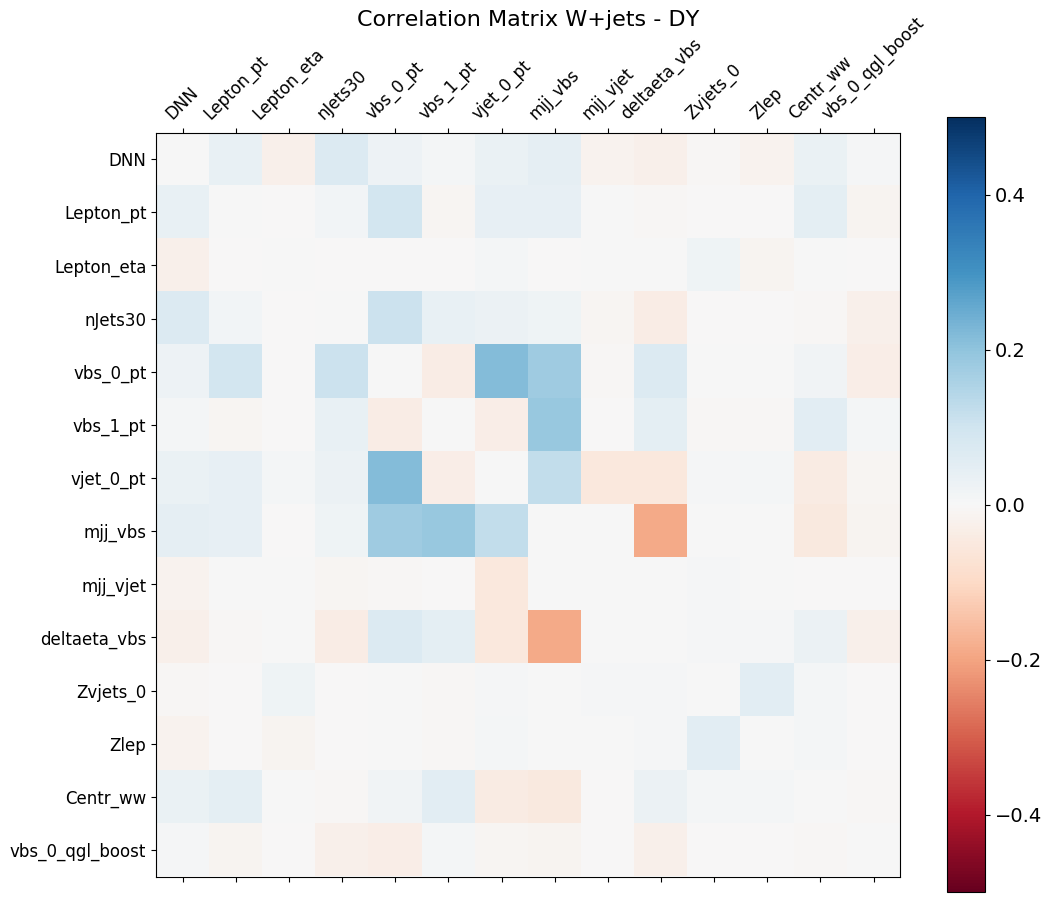

In [183]:
f = plt.figure(figsize=(12,10))
plt.matshow(wjets.corr() - DY.corr(), fignum=f.number, cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.xticks(range(wjets.shape[1]), wjets.columns, fontsize=12, rotation=45)
plt.yticks(range(wjets.shape[1]), wjets.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix W+jets - DY', fontsize=16, pad=50);

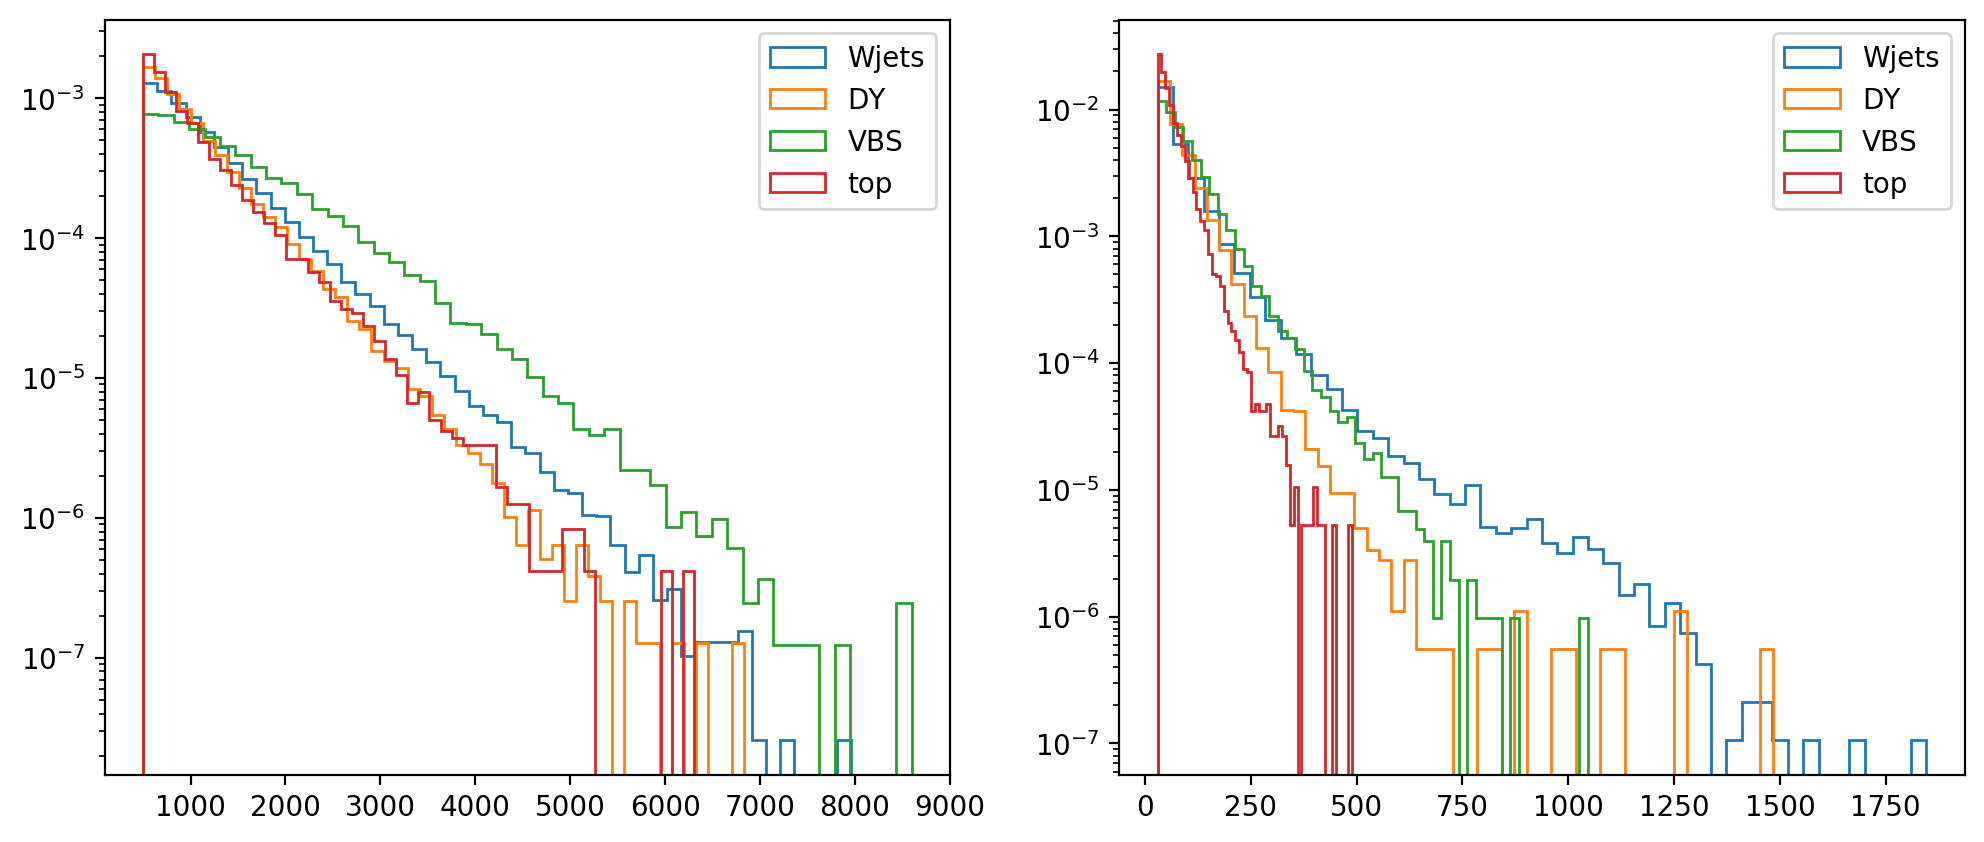

In [157]:
f, (ax,bx) = plt.subplots(1,2, figsize=(12,5), dpi=200)
for l,df in [('Wjets', wjets), ('DY', DY), ('VBS', sig), ('top',top)]:
    ax.hist(df['mjj_vbs'], label=l, bins=50, histtype='step', density=True)
    bx.hist(df['vbs_1_pt'], label=l, bins=50, histtype='step', density=True)
ax.legend()
bx.legend()
ax.set_yscale('log')
bx.set_yscale('log')

Text(0, 0.5, 'vbs_1_pt')

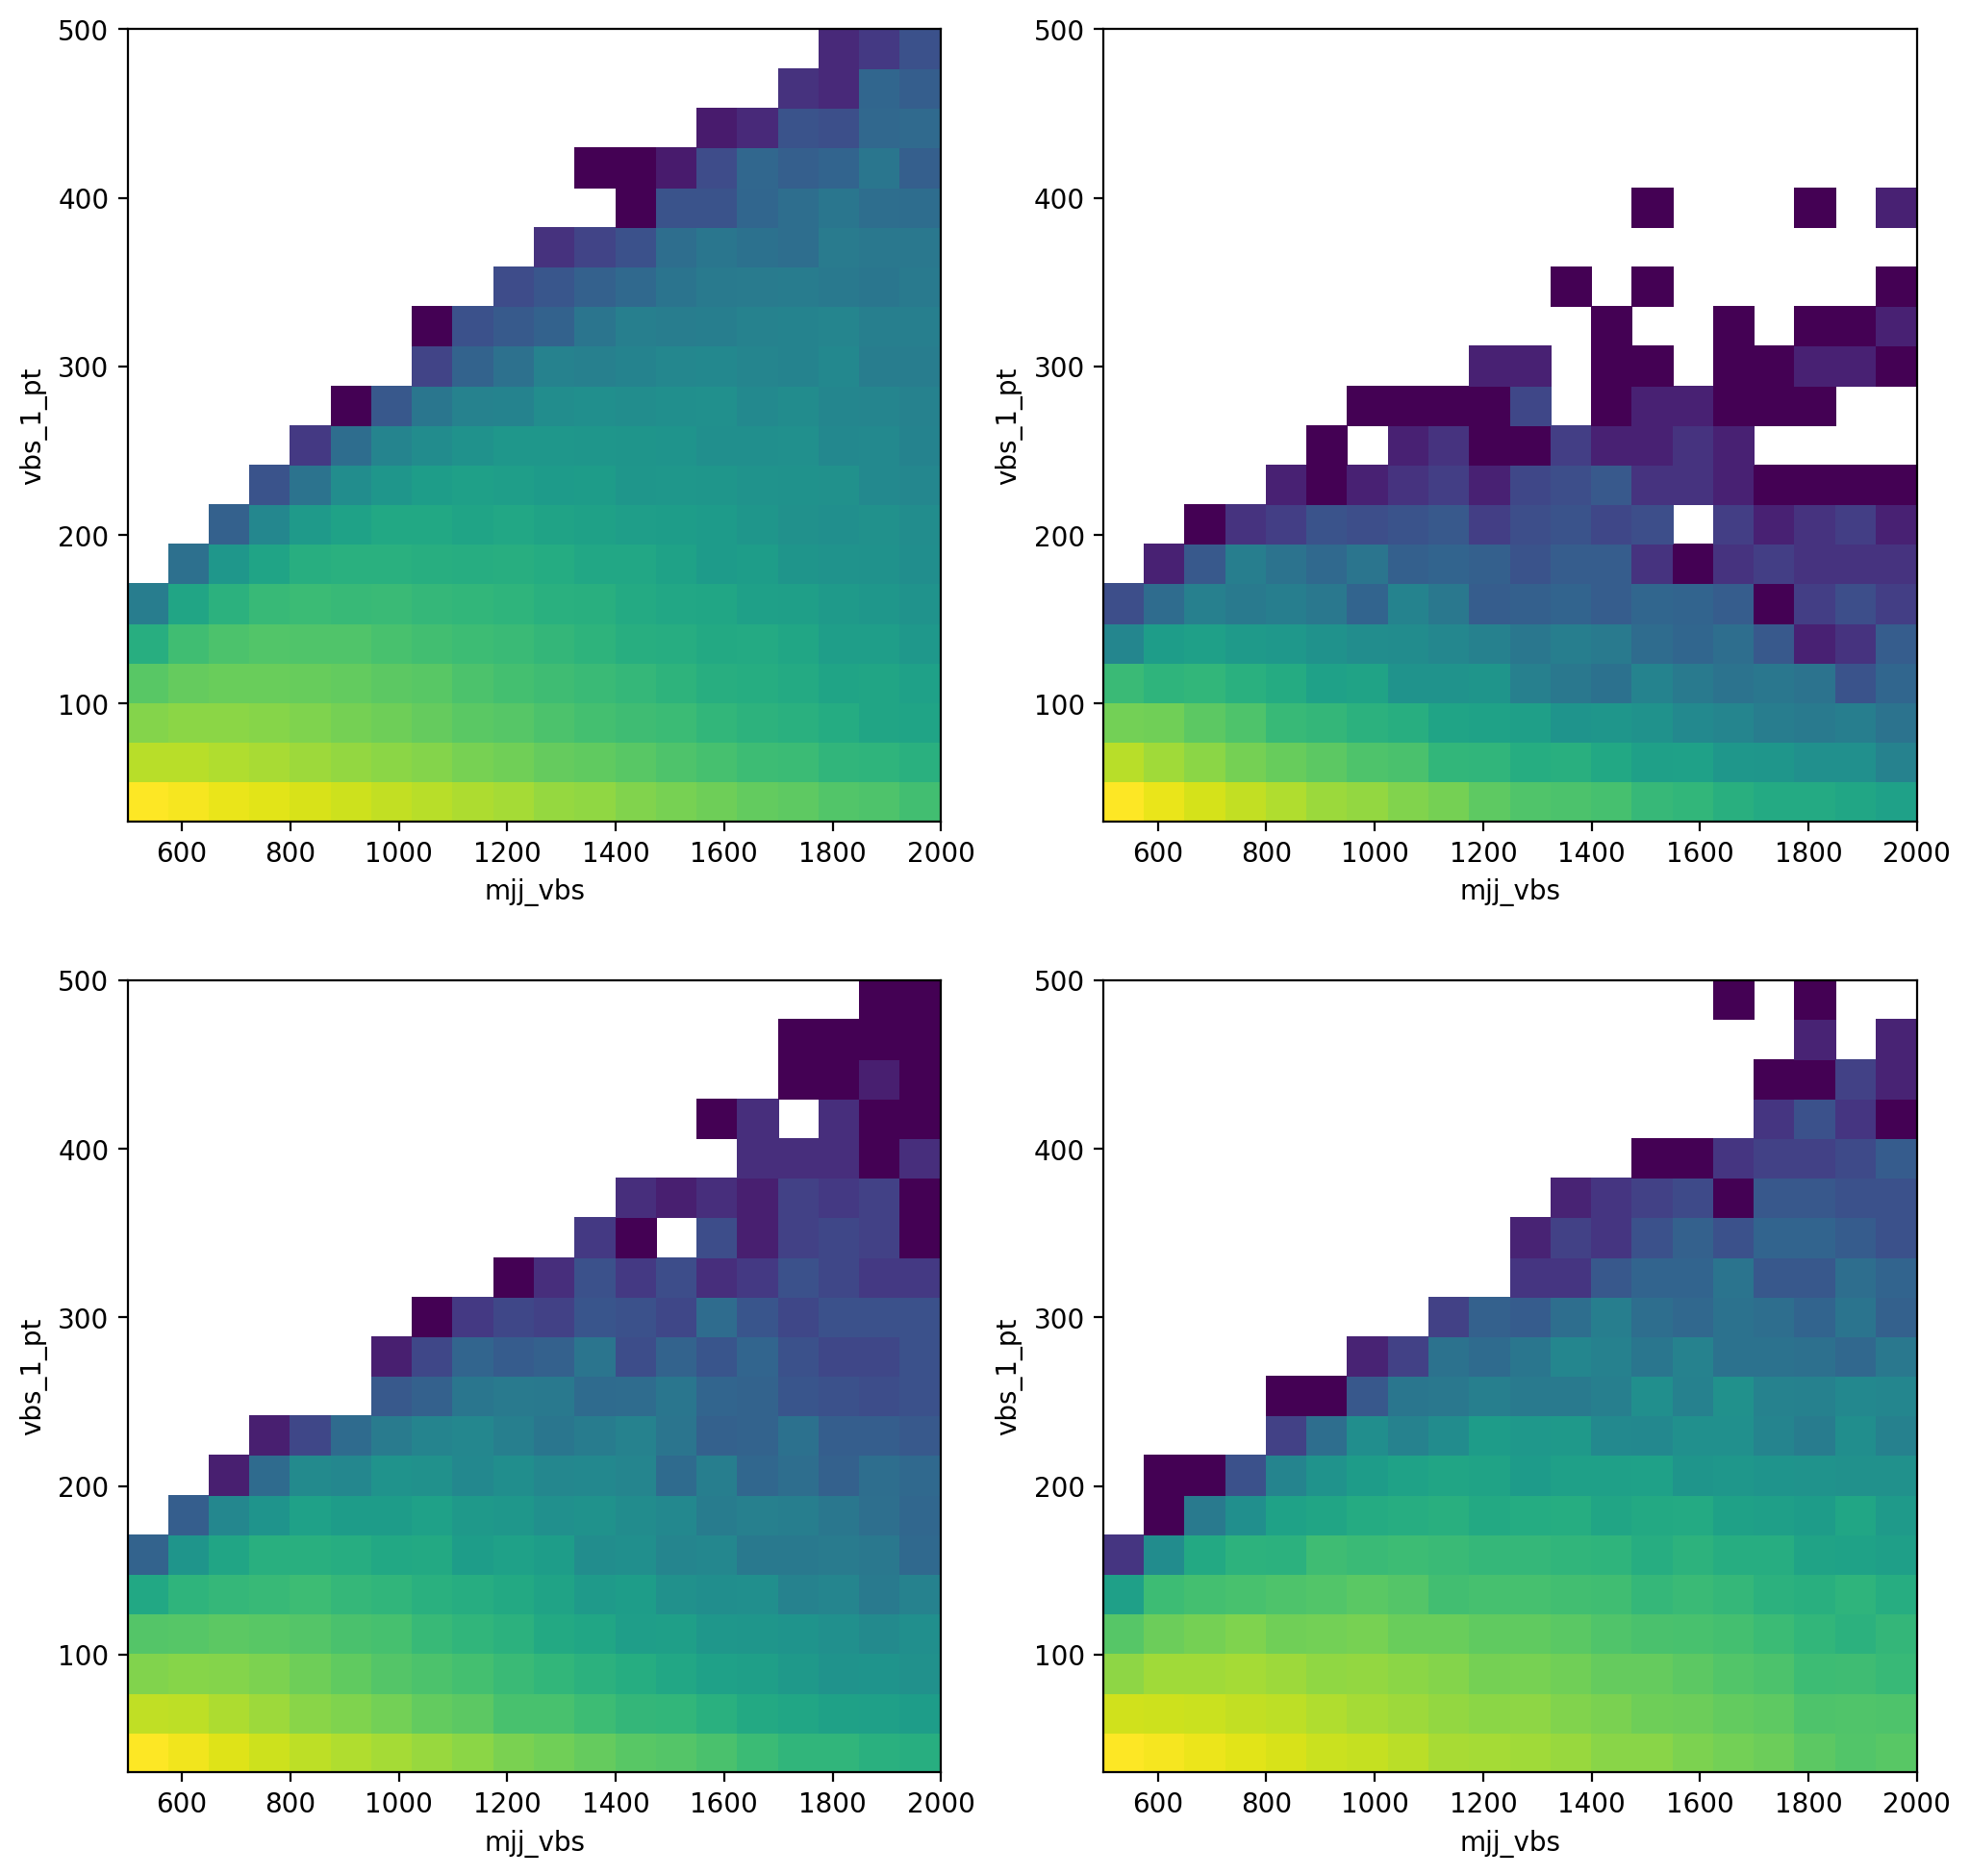

In [142]:
f, axs = plt.subplots(2,2, figsize=(12,12), dpi=200)
axs[0][0].hist2d(wjets['mjj_vbs'],wjets['vbs_1_pt'], label="wjets", bins=20, range=((500,2000.),(30,500)), norm=cl.LogNorm())
axs[0][1].hist2d(top['mjj_vbs'],top['vbs_1_pt'], label="top", bins=20, range=((500,2000.),(30,500)), norm=cl.LogNorm())
axs[1][0].hist2d(DY['mjj_vbs'],DY['vbs_1_pt'], label="DY", bins=20, range=((500,2000.),(30,500)), norm=cl.LogNorm())
axs[1][1].hist2d(sig['mjj_vbs'],sig['vbs_1_pt'], label="mjj_vbs", bins=20, range=((500,2000.),(30,500)), norm=cl.LogNorm())
axs[0][0].set_xlabel("mjj_vbs")
axs[0][1].set_xlabel("mjj_vbs")
axs[1][0].set_xlabel("mjj_vbs")
axs[1][1].set_xlabel("mjj_vbs")
axs[0][0].set_ylabel("vbs_1_pt")
axs[0][1].set_ylabel("vbs_1_pt")
axs[1][0].set_ylabel("vbs_1_pt")
axs[1][1].set_ylabel("vbs_1_pt")


Text(0, 0.5, 'deta_VBS')

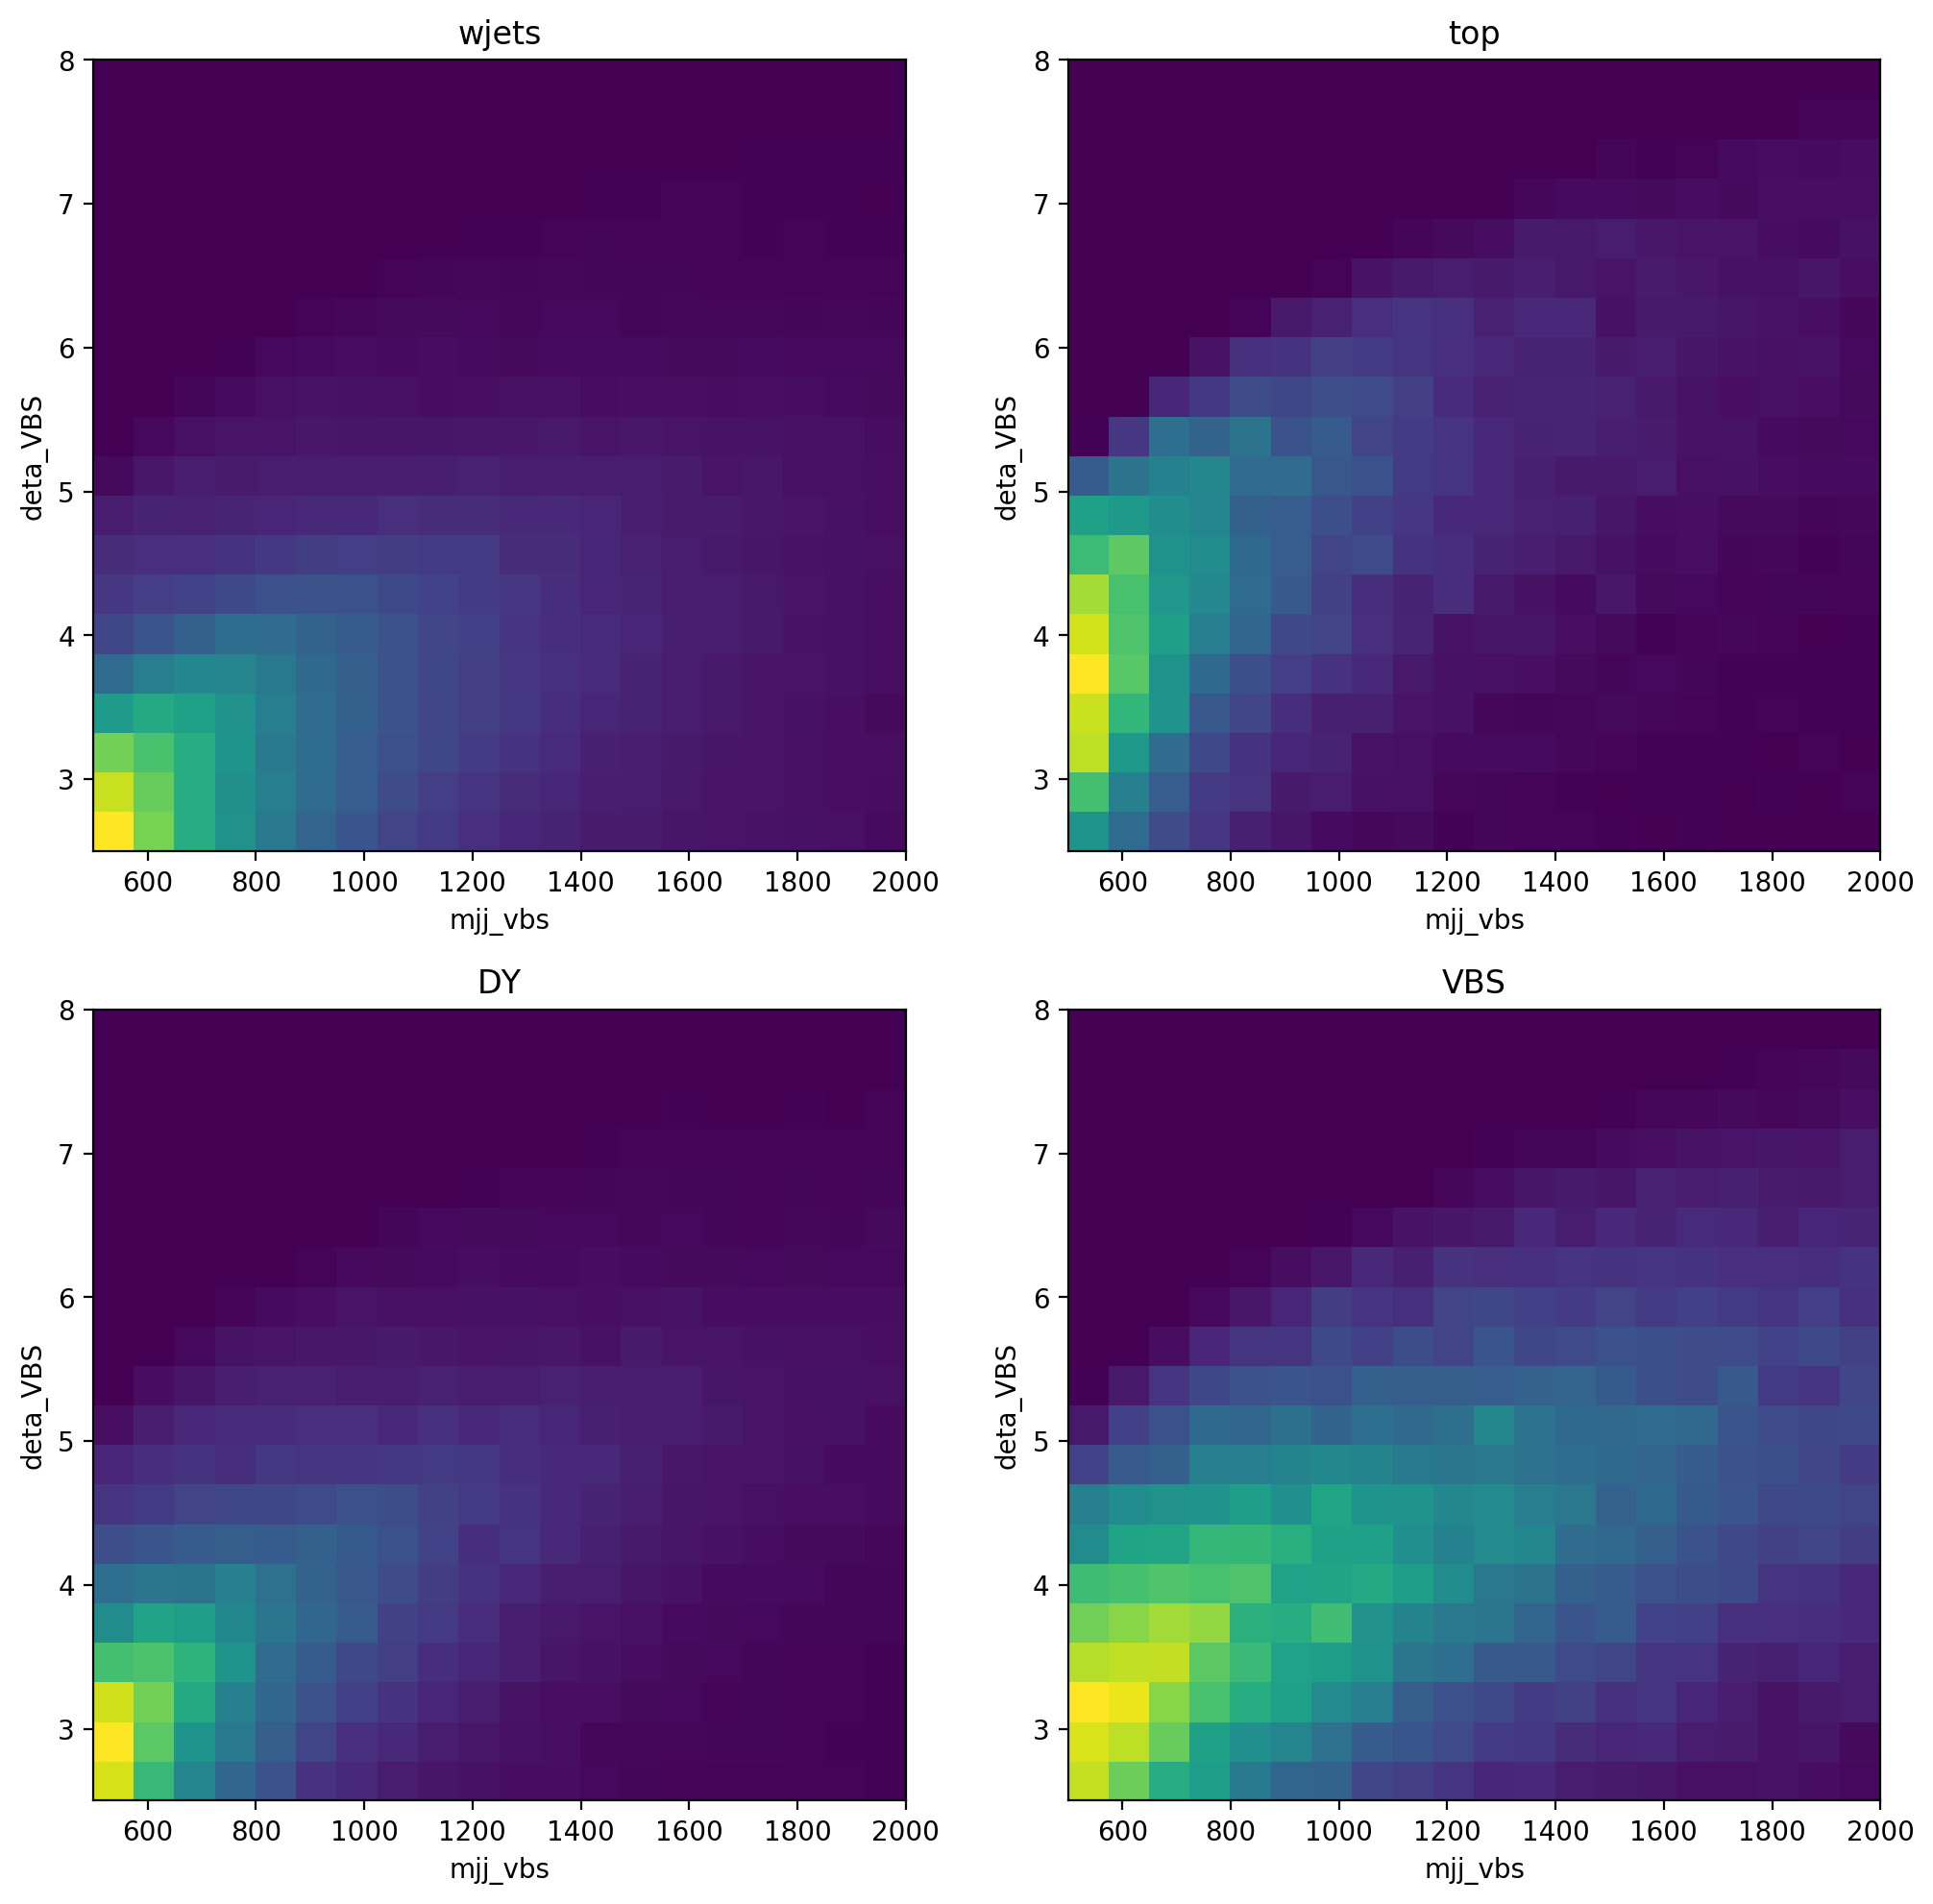

In [143]:
f, axs = plt.subplots(2,2, figsize=(12,12), dpi=200)
axs[0][0].hist2d(wjets['mjj_vbs'],wjets['deltaeta_vbs'], label="wjets", bins=20, range=((500,2000.),(2.5,8)), )
axs[0][1].hist2d(top['mjj_vbs'],top['deltaeta_vbs'], label="top", bins=20, range=((500,2000.),(2.5,8)),)
axs[1][0].hist2d(DY['mjj_vbs'],DY['deltaeta_vbs'], label="DY", bins=20, range=((500,2000.),(2.5,8)))
axs[1][1].hist2d(sig['mjj_vbs'],sig['deltaeta_vbs'], label="VBS", bins=20, range=((500,2000.),(2.5,8)),)
axs[0][0].set_title("wjets")
axs[0][1].set_title("top")
axs[1][0].set_title("DY")
axs[1][1].set_title("VBS")
axs[0][0].set_xlabel("mjj_vbs")
axs[0][1].set_xlabel("mjj_vbs")
axs[1][0].set_xlabel("mjj_vbs")
axs[1][1].set_xlabel("mjj_vbs")
axs[0][0].set_ylabel("deta_VBS")
axs[0][1].set_ylabel("deta_VBS")
axs[1][0].set_ylabel("deta_VBS")
axs[1][1].set_ylabel("deta_VBS")
